In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [5]:
data=sns.load_dataset('mpg')

In [6]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [8]:
data['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [9]:
data['model_year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [10]:
data['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [11]:
data.drop(['model_year','name'],axis=1,inplace=True)

In [12]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'origin'],
      dtype='object')

In [13]:
# we have to determine the value of Miles Per Gallon for a vehical on the basis of various vaiable given

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   origin        398 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 21.9+ KB


In [15]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
origin          0
dtype: int64

In [16]:
data.dropna(inplace=True)

In [17]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8,307.0,130.0,3504,12.0,usa
1,15.0,8,350.0,165.0,3693,11.5,usa
2,18.0,8,318.0,150.0,3436,11.0,usa
3,16.0,8,304.0,150.0,3433,12.0,usa
4,17.0,8,302.0,140.0,3449,10.5,usa


# Visualisation

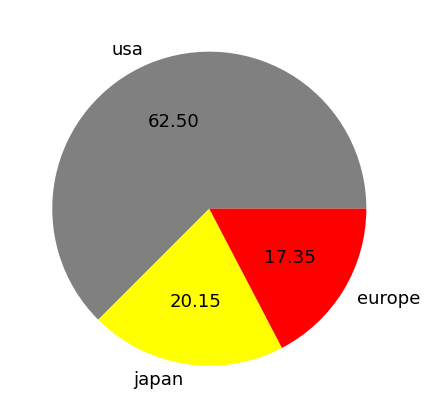

In [18]:
org=data['origin'].value_counts()
value=org.values
label=org.index
plt.figure(dpi=130)
plt.pie(value,labels=label,autopct="%.2f",colors=('grey','yellow','red'))
plt.show()

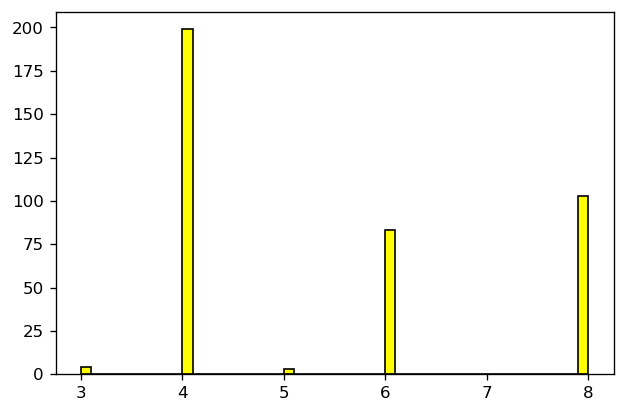

In [19]:
plt.figure(dpi=120)
plt.hist(data['cylinders'],color='yellow',ec='black',bins=50)
plt.show()     # 4 cylindes is most common

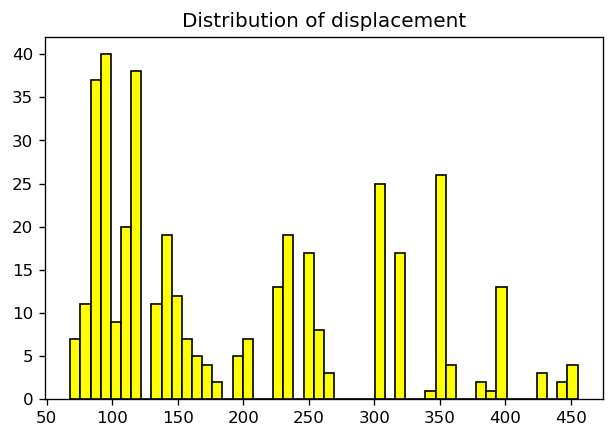

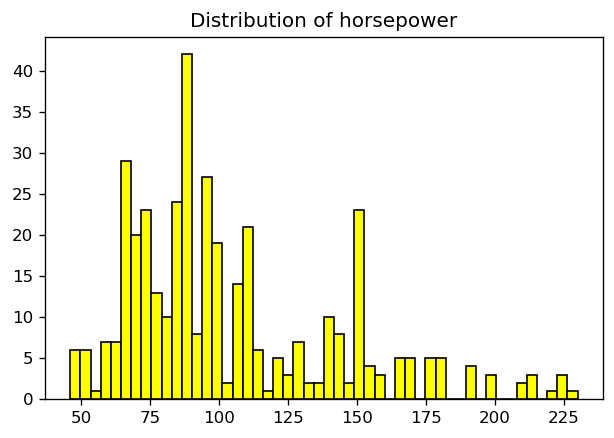

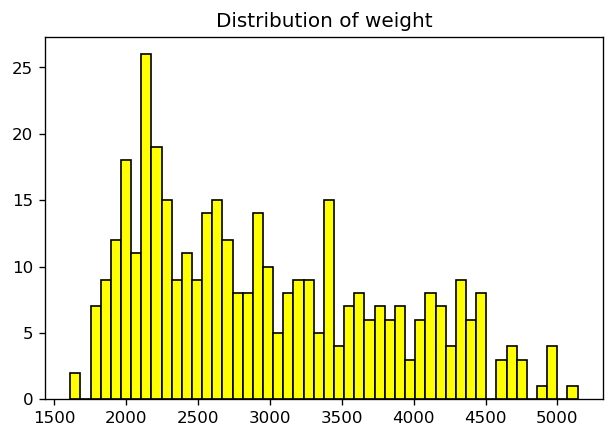

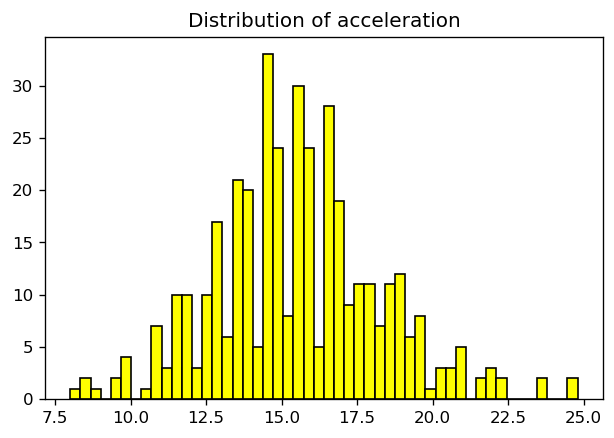

In [20]:
# frequncy distribution
for col in data.drop(['cylinders','origin','mpg'],axis=1):
    plt.figure(dpi=120)
    plt.title("Distribution of {}".format(col))
    plt.hist(data[col],bins=50,color='yellow',ec='black')
    plt.show()

In [21]:
for col in data.drop(['cylinders','mpg','origin'],axis=1):
    cor=np.corrcoef(data[col],data['mpg'])[0,1]
    print("The correlation of {} with mpg is: {}".format(col,cor))

The correlation of displacement with mpg is: -0.8051269467104577
The correlation of horsepower with mpg is: -0.7784267838977759
The correlation of weight with mpg is: -0.8322442148315753
The correlation of acceleration with mpg is: 0.4233285369027875


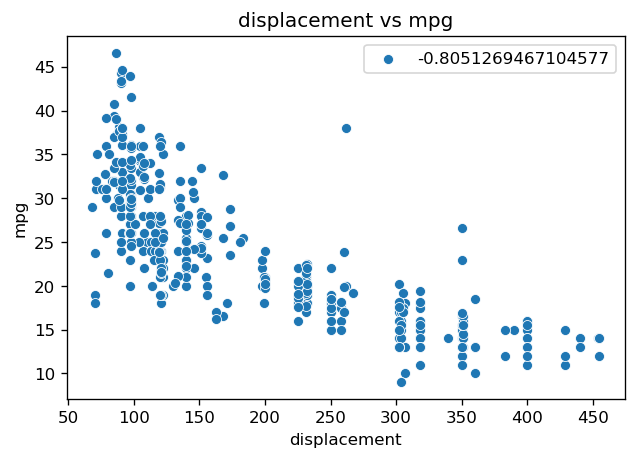

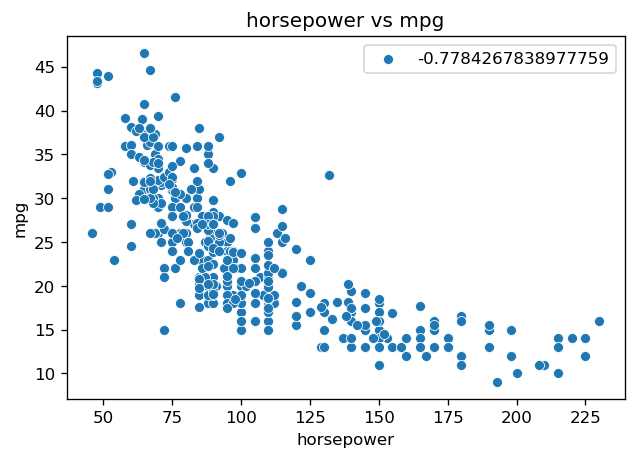

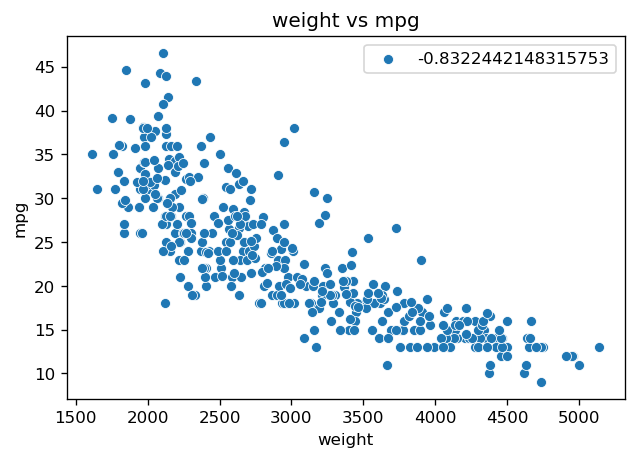

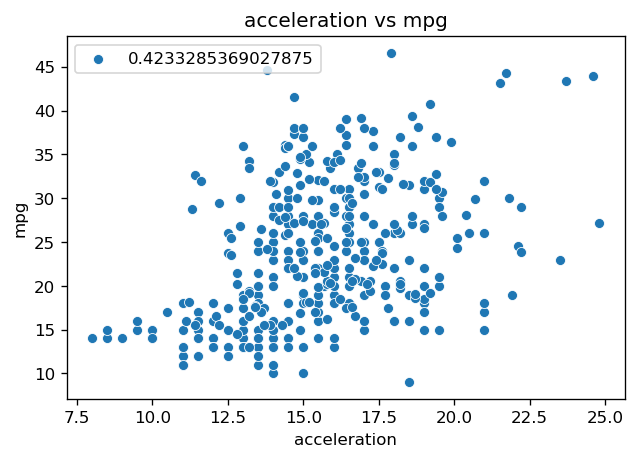

In [22]:
# relation
for col in data.drop(['mpg','cylinders','origin'],axis=1):
    plt.figure(dpi=120)
    plt.title("{} vs mpg".format(col))
    corr=np.corrcoef(data[col],data['mpg'])[0,1]
    sns.scatterplot(x=data[col],y=data['mpg'],label=corr)
    plt.show()

In [23]:
# preprocessing
from sklearn.model_selection import train_test_split
X=data.drop('mpg',axis=1)
y=data['mpg']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(313, 6)
(79, 6)
(313,)
(79,)


In [24]:
X_train_num=X_train.drop(['cylinders','origin'],axis=1)
X_train_cat=X_train[['cylinders','origin']]

In [25]:
X_train_num.head()

,displacement,horsepower,weight,acceleration
305,151.0,90.0,2670,16.0
81,97.0,92.0,2288,17.0
139,302.0,140.0,4638,16.0
195,85.0,52.0,2035,22.2
136,302.0,140.0,4141,14.0


In [26]:
X_train_cat.head()

,cylinders,origin
305,4,usa
81,4,japan
139,8,usa
195,4,usa
136,8,usa


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [28]:
num_pipeline=Pipeline([
    ('numerical',StandardScaler())
])

In [29]:
cat_pipeline=Pipeline([
    ('cat',OneHotEncoder())
])

In [30]:
num_attrs=list(X_train_num.columns)
cat_attrs=list(X_train_cat.columns)
pipeline=ColumnTransformer([
    ('num',num_pipeline,num_attrs),
    ('cat',cat_pipeline,cat_attrs)
])

In [31]:
X_train_tr=pipeline.fit(X_train)

In [32]:
num_col=num_attrs
cat_col=list(('8','4','6','3','5','usa','japan','europe'))
cols=num_col+cat_col

In [33]:
cols

['displacement',
 'horsepower',
 'weight',
 'acceleration',
 '8',
 '4',
 '6',
 '3',
 '5',
 'usa',
 'japan',
 'europe']

In [34]:
data=pipeline.transform(X_train)

In [35]:
X_train_tr=pd.DataFrame(data,columns=cols)

In [36]:
X_train_tr.head()

,displacement,horsepower,weight,acceleration,8,4,6,3,5,usa,japan,europe
0,-0.405604,-0.363202,-0.361610,0.143813,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.925098,-0.310486,-0.815311,0.507118,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.047058,0.954700,1.975778,0.143813,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-1.040542,-1.364808,-1.115798,2.396303,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.047058,0.954700,1.385493,-0.582797,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [37]:
lin_model_1= LinearRegression()

In [38]:
lin_model_1.fit(X_train_tr,y_train)

LinearRegression()

In [39]:
print(lin_model_1.coef_)
print(lin_model_1.intercept_)

[ 0.2373726  -3.60669325 -2.55670097 -0.61637324 -6.49030383  2.28510657
  4.89526712 -1.67775777  0.98768792 -1.07551895  1.9213504  -0.84583145]
22.687759286546672


In [40]:
train_actual=y_train

In [41]:
train_actual.head()

305    28.4
81     28.0
139    14.0
195    29.0
136    16.0
Name: mpg, dtype: float64

In [42]:
train_predict=pd.Series(lin_model_1.predict(X_train_tr),index=y_train.index)

In [43]:
train_predict.head()

305    26.176601
81     29.566383
139    14.494731
195    30.178227
136    16.451777
dtype: float64

In [44]:
from sklearn.metrics import r2_score

In [45]:
## train error or accuracy

In [46]:
print('Accuracy: ',r2_score(train_actual,train_predict)*100)

Accuracy:  75.03834635394723


In [47]:
## test error

In [48]:
X_test_tr=pipeline.transform(X_test)

In [49]:
X_test_tr=pd.DataFrame(X_test_tr,columns=cols)

In [50]:
X_test_tr.head()

,displacement,horsepower,weight,acceleration,8,4,6,3,5,usa,japan,europe
0,-0.915478,-0.943079,-0.997028,0.361796,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.306297,0.032169,0.758388,0.325465,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-1.040542,-0.890363,-1.169244,0.507118,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.373639,-0.363202,0.279746,0.579779,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.047058,0.664762,0.231051,-1.309406,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [51]:
y_test_pred=pd.Series(lin_model_1.predict(X_test_tr),index=y_test.index)

In [52]:
test_actual=y_test
test_predict=y_test_pred

In [53]:
print('Accuracy of training: ',r2_score(train_actual,train_predict)*100)
print('Accuracy of testing: ',r2_score(test_actual,test_predict)*100)

Accuracy of training:  75.03834635394723
Accuracy of testing:  76.3744701875158


In [54]:
## SGD MODEL

In [55]:
lin_model_2= SGDRegressor()

In [56]:
lin_model_2.fit(X_train_tr,y_train)

SGDRegressor()

In [57]:
train_actual=y_train
train_pred=lin_model_2.predict(X_train_tr)

In [58]:
test_act=y_test
test_pred=lin_model_2.predict(X_test_tr)

In [59]:
print('Accuracy of training: ',r2_score(train_actual,train_pred)*100)
print('Accuracy of testing: ',r2_score(test_act,test_pred)*100)

Accuracy of training:  74.3909932923585
Accuracy of testing:  76.54367719716345
